## AJAY VIKRAM SINGH: A0020986B e0384189@u.nus.edu
## RAHUL JALAN: A0195299H e0384930@u.nus.edu¶


# Random forest based Modelling
### we will model CP1, CP2, CP3 | CP-> Classification problem
### for each of the classification problem, we will use the curated data sets including both upsampling and down-sampling.
### in total, we will produce 5 modelling simulations - 2xCP1, 1XCP2, 3XCP3
### CP2 does not require data balancing hence no need for down/up sampling

In [53]:
#import relevant libraries for random forest

import sys
print(sys.executable)
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import roc_curve, auc
import os #operating system needs

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\python.exe


## Classification Problem 1 Modelling

In [4]:
# locate & load datasets

fpath       = os.path.join(os.getcwd(), "cp1")

#Test data - find current working directory, build the full pathname of the file, and load the data
fpath_test = os.path.join(fpath, "cp1_test.csv")
data_cp1_test=pd.read_csv(fpath_test)

y1_test = data_cp1_test.readmitted
X1_test = data_cp1_test.drop(columns=["readmitted"])


#Train data - find current working directory, build the full pathname of the file, and load the data

fpath_train_ds = os.path.join(fpath, "cp1_train_downsampled.csv")

fpath_train_us = os.path.join(fpath, "cp1_train_upsampled.csv")

print("file paths: ", fpath_train_ds, fpath_train_us)


data_cp1_train_ds = pd.read_csv(fpath_train_ds)
data_cp1_train_us = pd.read_csv(fpath_train_us)

file paths:  C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp1\cp1_train_downsampled.csv C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp1\cp1_train_upsampled.csv


## Classification problem 1: Down sampling 

In [5]:
#seperate features and predicted variables

y1_train_ds = data_cp1_train_ds.readmitted

X1_train_ds = data_cp1_train_ds.drop(columns=["readmitted"])

In [6]:
y1_test.unique()

array([0, 2, 1], dtype=int64)

In [7]:
# check for index columns from past
# X_train_ds.reset_index(drop=True)

In [8]:
# Run RF classifier
clf = RandomForestClassifier(n_estimators=200, random_state=0)  
clf.fit(X1_train_ds, y1_train_ds)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [9]:
y1_pred_ds = clf.predict(X1_test)

print("Confusion Matrix \n", confusion_matrix(y1_test,y1_pred_ds))  
print("classification report \n", classification_report(y1_test,y1_pred_ds))  
print("Accuracy Score", accuracy_score(y1_test, y1_pred_ds))  

Confusion Matrix 
 [[7077 2844 3404]
 [2731 2695 3362]
 [ 813  680 1267]]
classification report 
               precision    recall  f1-score   support

           0       0.67      0.53      0.59     13325
           1       0.43      0.31      0.36      8788
           2       0.16      0.46      0.23      2760

    accuracy                           0.44     24873
   macro avg       0.42      0.43      0.40     24873
weighted avg       0.53      0.44      0.47     24873

Accuracy Score 0.44381457805652713


## Classification problem 1: Up Sampling

In [10]:
#seperate features and predicted variables

y1_train_us = data_cp1_train_us.readmitted

X1_train_us = data_cp1_train_us.drop(columns=["readmitted"])

In [11]:
# Run RF classifier
clf = RandomForestClassifier(n_estimators=200, random_state=0)  
clf.fit(X1_train_us, y1_train_us)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
y1_pred_us = clf.predict(X1_test)

print("Confusion Matrix \n", confusion_matrix(y1_test,y1_pred_us))  
print("classification report \n", classification_report(y1_test,y1_pred_us))  
print("Accuracy Score", accuracy_score(y1_test, y1_pred_us))

Confusion Matrix 
 [[10895  2229   201]
 [ 5415  3035   338]
 [ 1684   889   187]]
classification report 
               precision    recall  f1-score   support

           0       0.61      0.82      0.70     13325
           1       0.49      0.35      0.41      8788
           2       0.26      0.07      0.11      2760

    accuracy                           0.57     24873
   macro avg       0.45      0.41      0.40     24873
weighted avg       0.53      0.57      0.53     24873

Accuracy Score 0.5675632211635107


# Classification Problem 2 Modelling

In [54]:
# locate and load datasets

fpath       = os.path.join(os.getcwd(), "cp2")

#Test data - find current working directory and build the full pathname of the file
fpath_test = os.path.join(fpath, "cp2_test.csv")
data_cp2_test=pd.read_csv(fpath_test)


y2_test = data_cp2_test.readmit_noreadmit
X2_test = data_cp2_test.drop(columns=["readmit_noreadmit"])


#Train data - find current working directory and build the full pathname of the file

fpath_train = os.path.join(fpath, "cp2_train.csv")
print("file paths: ", fpath_train)

data_cp2_train = pd.read_csv(fpath_train)

file paths:  C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp2\cp2_train.csv


In [55]:
y2_test.unique()

array([0, 1], dtype=int64)

In [56]:
#seperate features and predicted variables

y2_train = data_cp2_train.readmit_noreadmit

X2_train = data_cp2_train.drop(columns=["readmit_noreadmit"])

### Hyper parameter n_estimators

In [62]:
# Run RF classifier

n_estimators = [10,50,80,100,120,150,180,200]

train_results = []
test_results = []


for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X2_train, y2_train)   

    train_pred = rf.predict(X2_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_train, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   

    y_pred = rf.predict(X2_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    

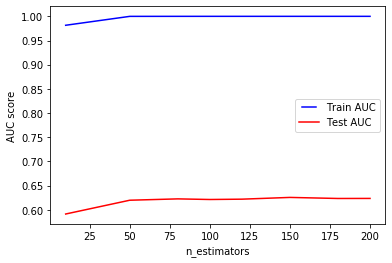

In [63]:


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

### n_estimators =60. Keep simple

## Hyper parameter max_depth

In [64]:
# Run RF classifier

max_depths = np.linspace(1, 40, 40, endpoint=True)

train_results = []
test_results = []


for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X2_train, y2_train)   

    train_pred = rf.predict(X2_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_train, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   

    y_pred = rf.predict(X2_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\A

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\A

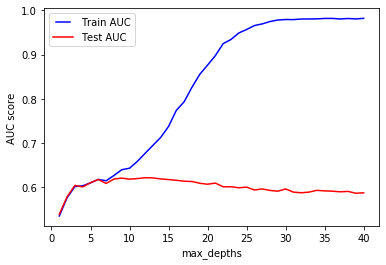

In [65]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

### max_depth = 8

## Hyper param: min samples at leaf

In [80]:
# Run RF classifier

min_samples_leafs = np.linspace(0.01, 0.5, 5, endpoint=True)

train_results = []
test_results = []


for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_jobs=-1)
    rf.fit(X2_train, y2_train)   

    train_pred = rf.predict(X2_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_train, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   

    y_pred = rf.predict(X2_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\A

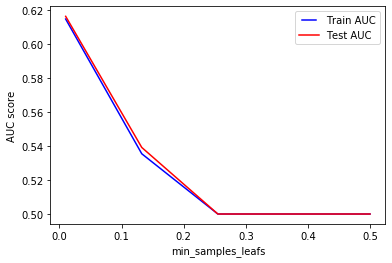

In [81]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

### min samples per leaf =0.01

## Hyper param: number of max_Features 

In [68]:
# Run RF classifier

max_features = list(range(1,X2_train.shape[1]))

train_results = []
test_results = []


for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    rf.fit(X2_train, y2_train)   

    train_pred = rf.predict(X2_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_train, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   

    y_pred = rf.predict(X2_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\A

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\A

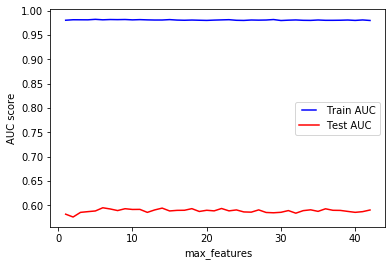

In [69]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

### Max number of features 5 (does not matter, keep less)

## Hyper Param min samples split

In [84]:
# Run RF classifier

min_samples_splits = np.linspace(0.01, 1.0, 10, endpoint=True)

train_results = []
test_results = []


for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(X2_train, y2_train)   

    train_pred = rf.predict(X2_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_train, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   

    y_pred = rf.predict(X2_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\A

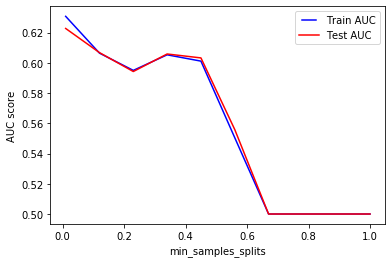

In [85]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

### min_samples_splits = 0.01

## testing with final optimized forest

In [90]:
clf = RandomForestClassifier(n_estimators=60,
                             max_depth = 8,
                             min_samples_split = 0.01,
                             min_samples_leaf = 0.01,
                             max_features = 5,
                             random_state=0)  
clf.fit(X2_train, y2_train)  
#y2_pred = clf.predict(X2_test)
#print("Number of trees, Accuracy Score", i, accuracy_score(y2_test, y2_pred))

y2_pred = clf.predict(X2_test)

print("Confusion Matrix \n", confusion_matrix(y2_test,y2_pred))  
print("classification report \n", classification_report(y2_test,y2_pred))  
print("Accuracy Score", accuracy_score(y2_test, y2_pred))

Confusion Matrix 
 [[10425  2900]
 [ 6415  5133]]
classification report 
               precision    recall  f1-score   support

           0       0.62      0.78      0.69     13325
           1       0.64      0.44      0.52     11548

    accuracy                           0.63     24873
   macro avg       0.63      0.61      0.61     24873
weighted avg       0.63      0.63      0.61     24873

Accuracy Score 0.6254975274393921


# Classification Problem 3 Modelling

In [22]:
# locate & load datasets

fpath       = os.path.join(os.getcwd(), "cp3")

#Test data - find current working directory, build the full pathname of the file, and load the data
fpath_test = os.path.join(fpath, "cp3_test.csv")
data_cp3_test=pd.read_csv(fpath_test)

data_cp3_test.readmit_in_30_days

y3_test = data_cp3_test.readmit_in_30_days
X3_test = data_cp3_test.drop(columns=["readmit_in_30_days"])


#Train data - find current working directory, build the full pathname of the file, and load the data

fpath_train_ds = os.path.join(fpath, "cp3_train_downsampled.csv")

fpath_train_us = os.path.join(fpath, "cp3_train_upsampled.csv")

print("file paths: ", fpath_train_ds, fpath_train_us)


data_cp3_train_ds = pd.read_csv(fpath_train_ds)
data_cp3_train_us = pd.read_csv(fpath_train_us)

file paths:  C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp3\cp3_train_downsampled.csv C:\Users\ajayv\iCloudDrive\Documents\work\OneDrive - Nokia\01-knowledge\01-NUS-MTechISS\02-2019sem2\CA1\diabetesclassifier\dataset_diabetes\cp3\cp3_train_upsampled.csv


## Classification Problem 3: Down Sampling

In [91]:
#seperate features and predicted variables

y3_train_ds = data_cp3_train_ds.readmit_in_30_days

X3_train_ds = data_cp3_train_ds.drop(columns=["readmit_in_30_days"])

In [92]:
# Run RF classifier
clf = RandomForestClassifier(n_estimators=60,
                             max_depth = 8,
                             min_samples_split = 0.01,
                             min_samples_leaf = 0.01,
                             max_features = 5,
                             random_state=0)  

clf.fit(X3_train_ds, y3_train_ds)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [93]:
y3_pred_ds = clf.predict(X3_test)

print("Confusion Matrix \n", confusion_matrix(y3_test,y3_pred_ds))  
print("classification report \n", classification_report(y3_test,y3_pred_ds))  
print("Accuracy Score", accuracy_score(y3_test, y3_pred_ds))  

Confusion Matrix 
 [[5633 3221]
 [ 488  608]]
classification report 
               precision    recall  f1-score   support

           0       0.92      0.64      0.75      8854
           1       0.16      0.55      0.25      1096

    accuracy                           0.63      9950
   macro avg       0.54      0.60      0.50      9950
weighted avg       0.84      0.63      0.70      9950

Accuracy Score 0.6272361809045226


## Classification Problem 3: Up Sampling

In [100]:
#seperate features and predicted variables

y3_train_us = data_cp3_train_us.readmit_in_30_days

X3_train_us = data_cp3_train_us.drop(columns=["readmit_in_30_days"])


### Hyper parameter n_estimators

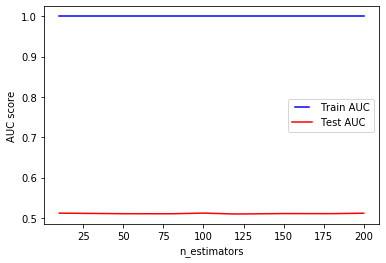

In [102]:
# Run RF classifier

n_estimators = [10,50,80,100,120,150,180,200]

train_results = []
test_results = []


for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X3_train_us, y3_train_us)   

    train_pred = rf.predict(X3_train_us)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y3_train_us, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   

    y_pred = rf.predict(X3_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y3_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
## Hyper parameter max_depth

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\A

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\A

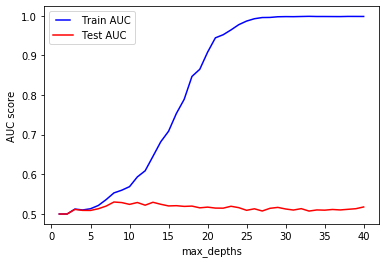

In [107]:
# Run RF classifier

max_depths = np.linspace(1, 40, 40, endpoint=True)

train_results = []
test_results = []


for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X3_train_us, y3_train_us)   

    train_pred = rf.predict(X3_train_us)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y3_train_us, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   

    y_pred = rf.predict(X3_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y3_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajayv\.conda\envs\A

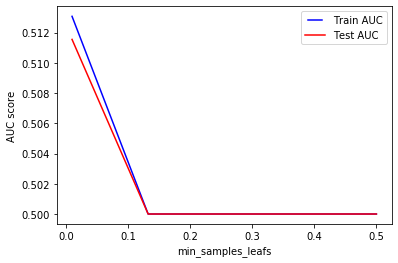

In [108]:
# Run RF classifier

min_samples_leafs = np.linspace(0.01, 0.5, 5, endpoint=True)

train_results = []
test_results = []


for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_jobs=-1)
    rf.fit(X3_train_us, y3_train_us)   

    train_pred = rf.predict(X3_train_us)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y3_train_us, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   

    y_pred = rf.predict(X3_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y3_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

In [111]:
# Run RF classifier
#clf = RandomForestClassifier(n_estimators=200, random_state=0, max_features='log2')  
clf = RandomForestClassifier(n_estimators=60,
                             max_depth = 8,
                             min_samples_split = 0.01,
                             min_samples_leaf = 0.001,
                             max_features = 5,
                             random_state=0)  

clf.fit(X3_train_us, y3_train_us) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.001, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [112]:
y3_pred_us = clf.predict(X3_test)

print("Confusion Matrix \n", confusion_matrix(y3_test,y3_pred_us))  
print("classification report \n", classification_report(y3_test,y3_pred_us))  
print("Accuracy Score", accuracy_score(y3_test, y3_pred_us))

Confusion Matrix 
 [[8784   70]
 [1053   43]]
classification report 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      8854
           1       0.38      0.04      0.07      1096

    accuracy                           0.89      9950
   macro avg       0.64      0.52      0.51      9950
weighted avg       0.84      0.89      0.84      9950

Accuracy Score 0.8871356783919598


In [31]:
RANDOM_STATE=10

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features="sqrt",
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

In [32]:
import matplotlib.pyplot as plt

from collections import OrderedDict

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

In [33]:

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 60

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X3_train_us, y3_train_us)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:460: UserW

C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\ajayv\.conda\envs\AJ-tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:460: UserW

xs <class 'tuple'>
ys <class 'tuple'>
xs <class 'tuple'>
ys <class 'tuple'>
xs <class 'tuple'>
ys <class 'tuple'>


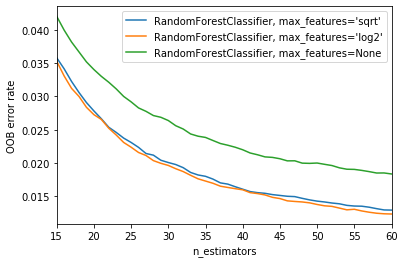

In [216]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
   
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    print("xs",type(xs))
    print("ys",type(ys))
    plt.plot(xs, ys, label=label)
    
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()